Importing the necessary libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Receiving and checking data

In [2]:
from pandas import read_csv
data = read_csv('loan_data.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


Checking columns and information about columns.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


Checking the number of null values ​​in columns.

In [4]:
data.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

Filling empty values ​​in columns according to redundancy.

In [5]:
# Filling in missing data in the Gender column
gender_counts = data['Gender'].value_counts() # Numbers of genders
most_frequent_gender = gender_counts.idxmax() # Most recurring gender
print('Most recurring gender:', most_frequent_gender)
data.fillna({'Gender': most_frequent_gender}, inplace=True) # Filling in missing data with the most recurring gender

# Filling in missing data in the Dependents column
dependents_counts = data['Dependents'].value_counts() # Numbers of Dependents
most_frequent_dependents = dependents_counts.idxmax() # Most recurring dependents
print('Most recurring dependents:', most_frequent_dependents)
data.fillna({'Dependents': most_frequent_dependents}, inplace=True) # Filling in missing data with the most recurring dependents

# Filling in missing data in the Self_Employed column
self_employed_counts = data['Self_Employed'].value_counts() # Numbers of Self_Employed
most_frequent_self_employed = self_employed_counts.idxmax() # Most recurring Self_Employed
print('Most recurring Self_Employed:', most_frequent_self_employed)
data.fillna({'Self_Employed': most_frequent_self_employed}, inplace=True) # Filling in missing data with the most recurring Self_Employed


# Filling in missing data in the Loan_Amount_Term column
loan_amount_term_counts = data['Loan_Amount_Term'].value_counts() # Numbers of Loan_Amount_Term
most_frequent_loan_amount_term = loan_amount_term_counts.idxmax() # Most recurring Loan_Amount_Term
print('Most recurring Loan_Amount_Term:', most_frequent_loan_amount_term)
data.fillna({'Loan_Amount_Term': most_frequent_loan_amount_term}, inplace=True) # Filling in missing data with the most recurring Loan_Amount_Term


# Filling in missing data in the Credit_History column
credit_history_counts = data['Credit_History'].value_counts() # Numbers of Credit_History
most_frequent_credit_history = credit_history_counts.idxmax() # Most recurring Credit_History
print('Most recurring Credit_History:', most_frequent_credit_history)
data.fillna({'Credit_History': most_frequent_credit_history}, inplace=True) # Filling in missing data with the most recurring Credit_History


Most recurring gender: Male
Most recurring dependents: 0
Most recurring Self_Employed: No
Most recurring Loan_Amount_Term: 360.0
Most recurring Credit_History: 1.0


Fixing corrupted data in the Dependents column

In [6]:
data['Dependents'] = data['Dependents'].replace({'3+': 3})

Deleting unnecessary columns

In [7]:
data.drop(columns=['Loan_ID'], inplace=True)

Check of columns

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             381 non-null    object 
 1   Married            381 non-null    object 
 2   Dependents         381 non-null    object 
 3   Education          381 non-null    object 
 4   Self_Employed      381 non-null    object 
 5   ApplicantIncome    381 non-null    int64  
 6   CoapplicantIncome  381 non-null    float64
 7   LoanAmount         381 non-null    float64
 8   Loan_Amount_Term   381 non-null    float64
 9   Credit_History     381 non-null    float64
 10  Property_Area      381 non-null    object 
 11  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 35.8+ KB


Loan approval percentage by gender

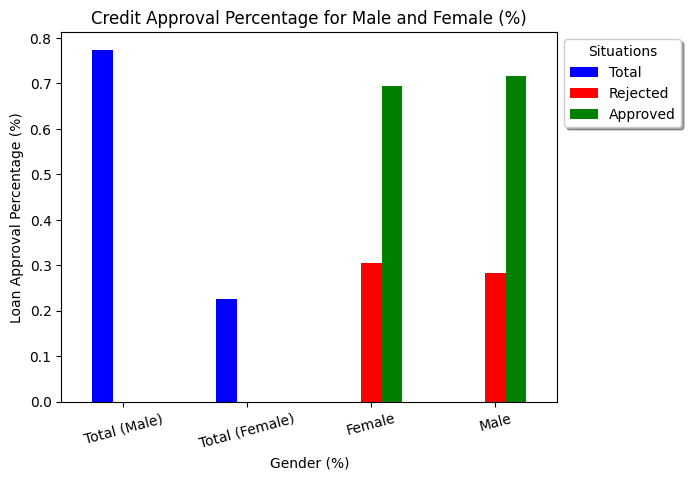

In [9]:
gender_loan_status_counts = data.groupby(['Gender', 'Loan_Status']).size().unstack()

# Calculating percentages
gender_counts_percent = gender_counts / gender_counts.sum()
gender_loan_status_counts_percent = gender_loan_status_counts.div(gender_loan_status_counts.sum(axis=1), axis=0)


combined_counts = pd.concat([gender_counts_percent, gender_loan_status_counts_percent], axis=0)

combined_counts.plot(kind='bar', color=['blue', 'red', 'green'])
plt.xlabel('Gender (%)')
plt.ylabel('Loan Approval Percentage (%)')
plt.title('Credit Approval Percentage for Male and Female (%)')
plt.xticks(ticks=[0, 1, 2, 3], rotation=15, labels=['Total (Male)', 'Total (Female)', 'Female', 'Male'])
plt.legend(bbox_to_anchor=(1, 1), ncol=1, title='Situations', shadow=True, labels=['Total', 'Rejected', 'Approved'])
plt.show()


Loan approval percentage by marital status

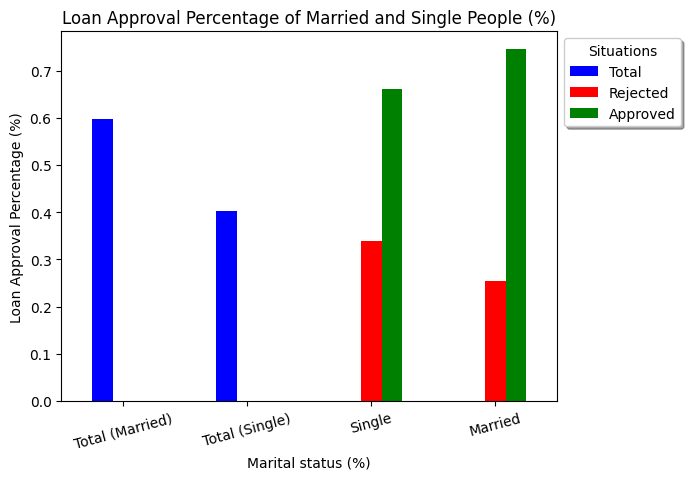

In [10]:
married_loan_status_counts = data.groupby(['Married', 'Loan_Status']).size().unstack()

# Calculating percentages
married_counts = data['Married'].value_counts()
married_counts_percent = married_counts / married_counts.sum()
married_loan_status_counts_percent = married_loan_status_counts.div(married_loan_status_counts.sum(axis=1), axis=0)

combined_counts = pd.concat([married_counts_percent, married_loan_status_counts_percent], axis=0)

combined_counts.plot(kind='bar', color=['blue', 'red', 'green'])
plt.xlabel('Marital status (%)')
plt.ylabel('Loan Approval Percentage (%)')
plt.title('Loan Approval Percentage of Married and Single People (%)')
plt.legend(['Total', 'Rejected', 'Approved'], bbox_to_anchor=(1, 1), ncol=1, title='Situations', shadow=True)
plt.xticks(ticks=[0,1,2,3], rotation=15, labels=['Total (Married)', 'Total (Single)', 'Single', 'Married'])
plt.show()

Loan approval percentage by education

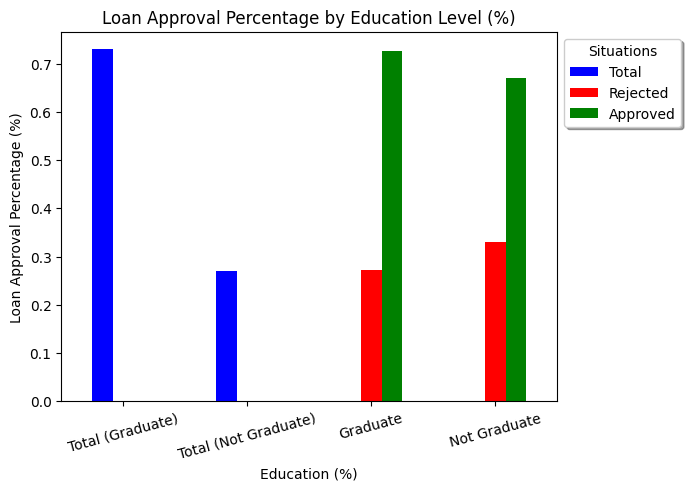

In [11]:
education_loan_status_counts = data.groupby(['Education', 'Loan_Status']).size().unstack()

# Calculating percentages
education_counts = data['Education'].value_counts()
education_counts_percent = education_counts / education_counts.sum()
education_loan_status_counts_percent = education_loan_status_counts.div(education_loan_status_counts.sum(axis=1), axis=0)

combined_counts = pd.concat([education_counts_percent, education_loan_status_counts_percent], axis=0)

combined_counts.plot(kind='bar', color=['blue', 'red', 'green'])
plt.xlabel('Education (%)')
plt.ylabel('Loan Approval Percentage (%)')
plt.title('Loan Approval Percentage by Education Level (%)')
plt.legend(['Total', 'Rejected', 'Approved'], bbox_to_anchor=(1, 1), ncol=1, title='Situations', shadow=True)
plt.xticks(ticks=[0,1,2,3], rotation=15, labels=['Total (Graduate)', 'Total (Not Graduate)', 'Graduate', 'Not Graduate'])
plt.show()

Loan approval percentage by Self-Employment

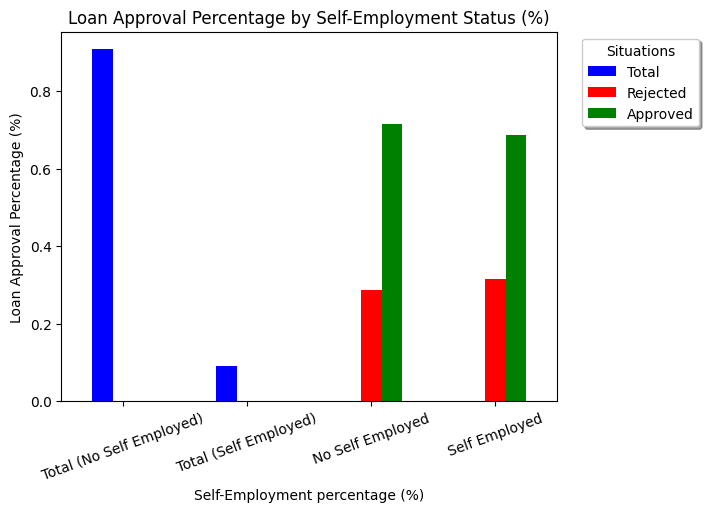

In [12]:
self_employed_loan_status_counts = data.groupby(['Self_Employed', 'Loan_Status']).size().unstack()

# Calculating percentages
self_employed_counts = data['Self_Employed'].value_counts()
self_employed_counts_percent = self_employed_counts / self_employed_counts.sum()
self_employed_loan_status_counts_percent = self_employed_loan_status_counts.div(self_employed_loan_status_counts.sum(axis=1), axis=0)

combined_counts = pd.concat([self_employed_counts_percent, self_employed_loan_status_counts_percent], axis=0)

combined_counts.plot(kind='bar', color=['blue', 'red', 'green'])
plt.xlabel('Self-Employment percentage (%)')
plt.ylabel('Loan Approval Percentage (%)')
plt.title('Loan Approval Percentage by Self-Employment Status (%)')
plt.legend(['Total', 'Rejected', 'Approved'], bbox_to_anchor=(1.3, 1), ncol=1, title='Situations', shadow=True)
plt.xticks(ticks=[0,1,2,3], rotation=20, labels=['Total (No Self Employed)', 'Total (Self Employed)', 'No Self Employed', 'Self Employed'])
plt.show()

Loan Approval Percentage Based on Applicant's Income

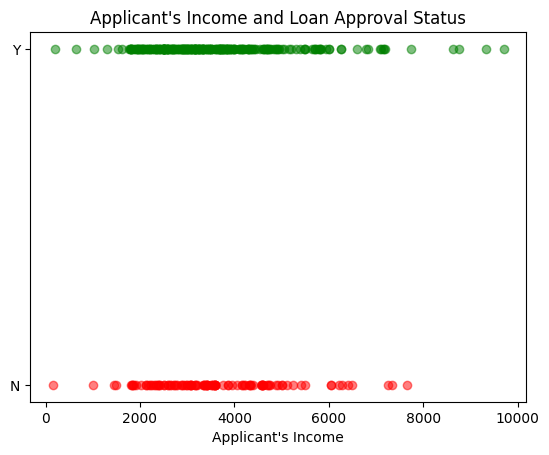

In [13]:
# Creating charts
for status in data["Loan_Status"].unique():
    plt.scatter(data[data["Loan_Status"] == status]["ApplicantIncome"], 
                data[data["Loan_Status"] == status]["Loan_Status"], label=status, alpha=0.5, c=['red', 'green'][status == 'Y'])

# Graphic customization
plt.title("Applicant's Income and Loan Approval Status")
plt.xlabel("Applicant's Income")
plt.show()

Approved Loan Amounts Based on Applicant Income

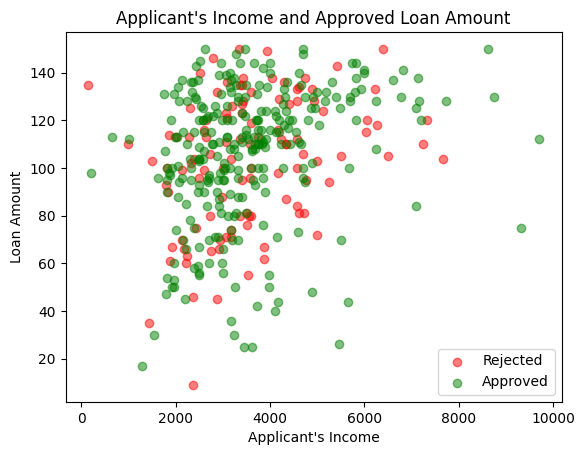

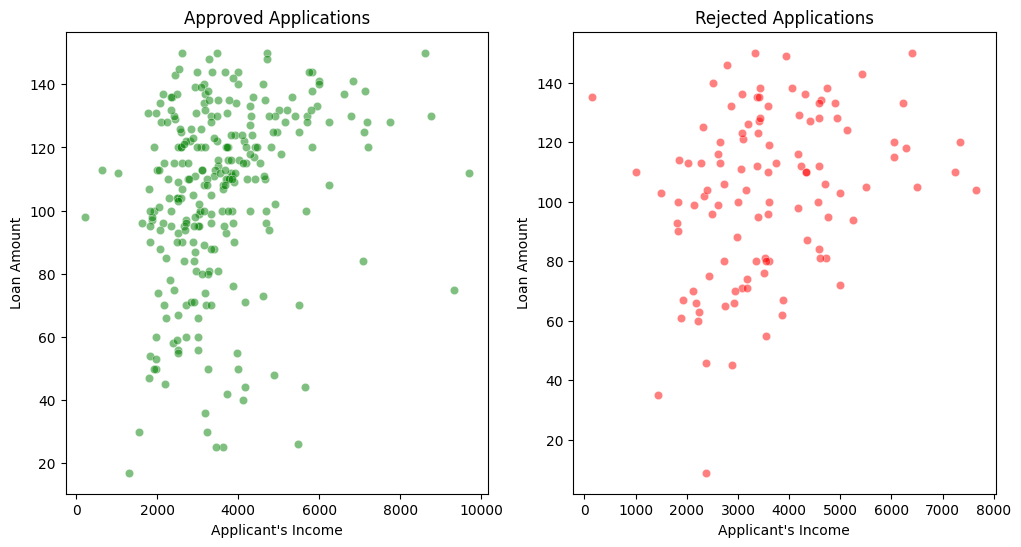

In [14]:
for status in data["Loan_Status"].unique():
    plt.scatter(data[data["Loan_Status"] == status]["ApplicantIncome"], 
                data[data["Loan_Status"] == status]["LoanAmount"], label=status, alpha=0.5, c=['red', 'green'][status == 'Y'])

plt.title("Applicant's Income and Approved Loan Amount")
plt.xlabel("Applicant's Income")
plt.ylabel("Loan Amount")
plt.legend(labels = ['Rejected', 'Approved'])
plt.show()


# Separation of approved and rejected applications
approved_loans = data[data['Loan_Status'] == 'Y']
rejected_loans = data[data['Loan_Status'] == 'N']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Chart for approved applications
sns.scatterplot(x="ApplicantIncome", y="LoanAmount", data=approved_loans, color='green', alpha=0.5, ax=ax1)
ax1.set_title("Approved Applications")
ax1.set_xlabel("Applicant's Income")
ax1.set_ylabel("Loan Amount")

# Chart for rejected applications
sns.scatterplot(x="ApplicantIncome", y="LoanAmount", data=rejected_loans, color='red', alpha=0.5, ax=ax2)
ax2.set_title("Rejected Applications")
ax2.set_xlabel("Applicant's Income")
ax2.set_ylabel("Loan Amount")

plt.show()

Loan Approval Status by Co-Applicant Income

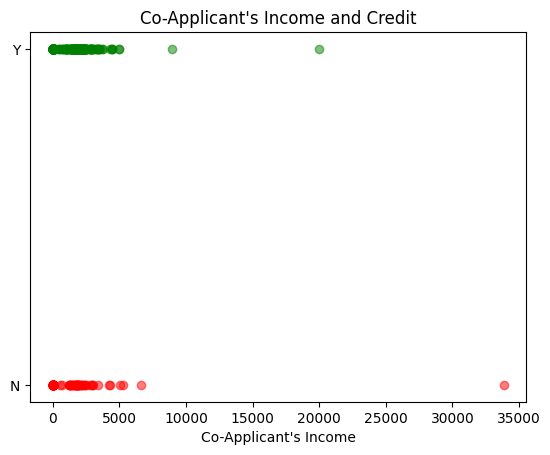

In [15]:
for status in data["Loan_Status"].unique():
    plt.scatter(data[data["Loan_Status"] == status]["CoapplicantIncome"], 
                data[data["Loan_Status"] == status]["Loan_Status"], label=status, alpha=0.5, c=['red', 'green'][status == 'Y'])

plt.title("Co-Applicant's Income and Credit")
plt.xlabel("Co-Applicant's Income")
plt.show()

Approved Loan Amounts Based on Co-Applicant's Income

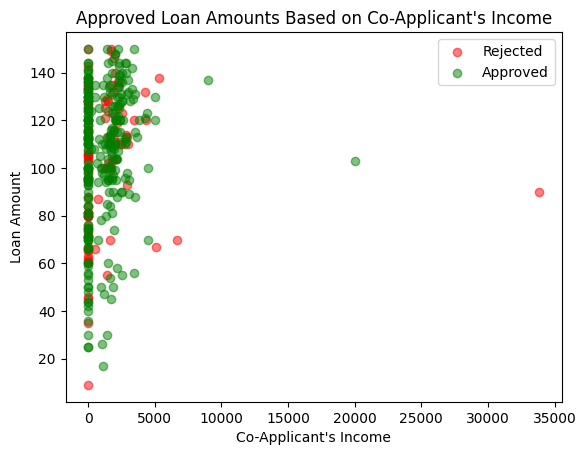

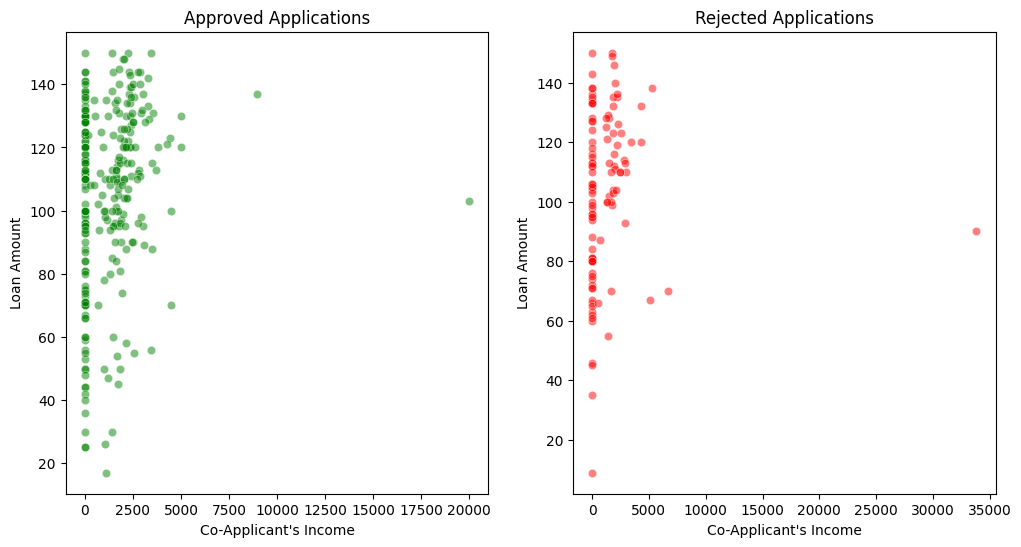

In [16]:
for status in data["Loan_Status"].unique():
    plt.scatter(data[data["Loan_Status"] == status]["CoapplicantIncome"], 
                data[data["Loan_Status"] == status]["LoanAmount"], label=status, alpha=0.5, c=['red', 'green'][status == 'Y'])

plt.title("Approved Loan Amounts Based on Co-Applicant's Income")
plt.xlabel("Co-Applicant's Income")
plt.ylabel("Loan Amount")
plt.legend(labels = ['Rejected', 'Approved'])
plt.show()

# Separation of approved and rejected applications
approved_loans = data[data['Loan_Status'] == 'Y']
rejected_loans = data[data['Loan_Status'] == 'N']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Chart for approved applications
sns.scatterplot(x="CoapplicantIncome", y="LoanAmount", data=approved_loans, color='green', alpha=0.5, ax=ax1)
ax1.set_title("Approved Applications")
ax1.set_xlabel("Co-Applicant's Income")
ax1.set_ylabel("Loan Amount")

# Chart for rejected applications
sns.scatterplot(x="CoapplicantIncome", y="LoanAmount", data=rejected_loans, color='red', alpha=0.5, ax=ax2)
ax2.set_title("Rejected Applications")
ax2.set_xlabel("Co-Applicant's Income")
ax2.set_ylabel("Loan Amount")

plt.show()

Loan approval status by loan amount

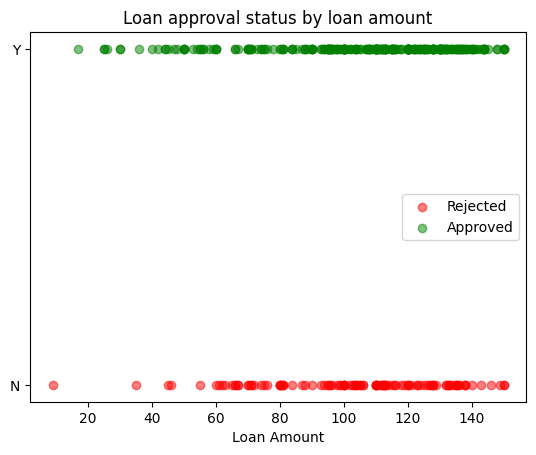

In [17]:
for status in data["Loan_Status"].unique():
    plt.scatter(data[data["Loan_Status"] == status]["LoanAmount"], 
                data[data["Loan_Status"] == status]["Loan_Status"], label=status, alpha=0.5, c=['red', 'green'][status == 'Y'])

plt.title("Loan approval status by loan amount")
plt.xlabel("Loan Amount")
plt.legend(labels = ['Rejected', 'Approved'])
plt.show()

Loan Approval Status by Loan Amount and Maturity

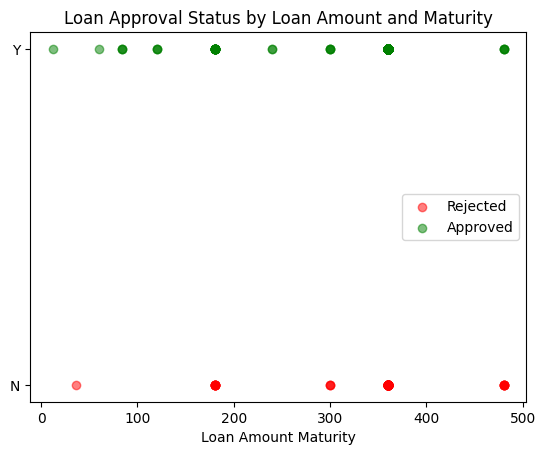

In [18]:
for status in data["Loan_Status"].unique():
    plt.scatter(data[data["Loan_Status"] == status]["Loan_Amount_Term"], 
                data[data["Loan_Status"] == status]["Loan_Status"], label=status, alpha=0.5, c=['red', 'green'][status == 'Y'])

plt.title("Loan Approval Status by Loan Amount and Maturity")
plt.xlabel("Loan Amount Maturity")
plt.legend(labels = ['Rejected', 'Approved'])
plt.show()

# bar olarak göster

Loan Approval Percentage by Property Area

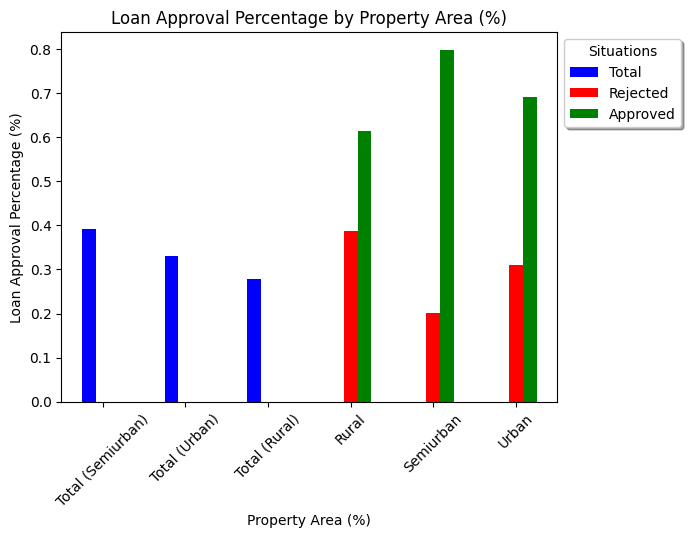

In [19]:
property_area_loan_status_counts = data.groupby(['Property_Area', 'Loan_Status']).size().unstack()

# Calculating percentages
property_area_counts = data['Property_Area'].value_counts()
property_area_counts_percent = property_area_counts / property_area_counts.sum()
property_area_loan_status_counts_percent = property_area_loan_status_counts.div(property_area_loan_status_counts.sum(axis=1), axis=0)

combined_counts = pd.concat([property_area_counts_percent, property_area_loan_status_counts_percent], axis=0)

combined_counts.plot(kind='bar', color=['blue', 'red', 'green'])
plt.xlabel('Property Area (%)')
plt.ylabel('Loan Approval Percentage (%)')
plt.title('Loan Approval Percentage by Property Area (%)')
plt.legend(['Total', 'Rejected', 'Approved'], bbox_to_anchor=(1, 1), ncol=1, title='Situations', shadow=True)
plt.xticks(ticks=[0,1,2,3,4,5], rotation=45, labels=['Total (Semiurban)', 'Total (Urban)', 'Total (Rural)', 'Rural', 'Semiurban', 'Urban'])
plt.show()

One Hot Encoding

In [20]:
one_hot_encoded_data = pd.get_dummies(data, columns=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], dtype=int)
one_hot_encoded_data['Loan_Status'] = one_hot_encoded_data['Loan_Status'].replace({'Y': 1, 'N': 0})

# print(one_hot_encoded_data.head())

Logistic Regression algorithm will be used as the machine learning algorithm.
Reason 1: Easier to understand and use for beginners.
Reason 2: More easily interpretable algorithms. In line with our needs.
Reason 3: Our data set is small
Reason 4: It is the most popular algorithm for credit approval prediction.
Reason 5: Decision Trees can be used for visual interpretation.

In [21]:
# Data separation (assuming one_hot_encoded_data is your DataFrame)
X = one_hot_encoded_data.drop('Loan_Status', axis=1)
y = one_hot_encoded_data['Loan_Status']

# MinMaxScaler for normalization
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (for initial model evaluation)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model creation and training
model = LogisticRegression(C=1.0, penalty='l2', solver='lbfgs', max_iter=100)  # Increased max_iter
model.fit(X_train, y_train)

# Train set performance (using the initial split)
train_accuracy = accuracy_score(y_train, model.predict(X_train))
print(f"Training Accuracy: {train_accuracy}")

# Test set performance (using the initial split)
test_accuracy = accuracy_score(y_test, model.predict(X_test))
print(f"Test Accuracy: {test_accuracy}")

# K-Fold cross-validation for more robust evaluation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = []
for train_index, test_index in cv.split(X_scaled):
    X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train_fold, y_train_fold)
    accuracy_scores.append(accuracy_score(y_test_fold, model.predict(X_test_fold)))

# Print average cross-validation accuracy
print(f"K-Fold Cross-Validation Accuracy: {np.mean(accuracy_scores)}")


Training Accuracy: 0.8519736842105263
Test Accuracy: 0.8181818181818182
K-Fold Cross-Validation Accuracy: 0.8399521531100479


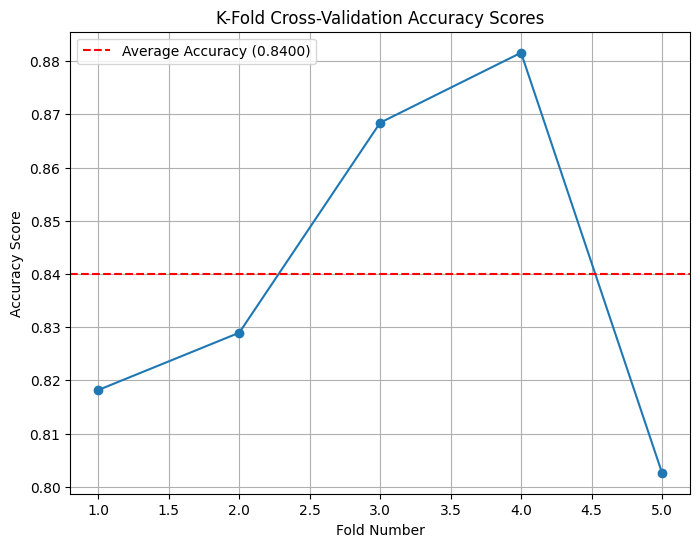

In [22]:
# Extract accuracy scores from the list
accuracy_scores = [score for score in accuracy_scores]  # Assuming accuracy_scores is defined

# Set up the plot
plt.figure(figsize=(8, 6))  # Customize figure size if desired
plt.plot(range(1, len(accuracy_scores) + 1), accuracy_scores, marker='o', linestyle='-')  # Plot scores vs. fold number
plt.xlabel('Fold Number')
plt.ylabel('Accuracy Score')
plt.title('K-Fold Cross-Validation Accuracy Scores')
plt.grid(True)

# Optional: Add a horizontal line for the average accuracy
average_accuracy = np.mean(accuracy_scores)
plt.axhline(y=average_accuracy, color='r', linestyle='--', label=f'Average Accuracy ({average_accuracy:.4f})')
plt.legend()

plt.show()